In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [3]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Find the Top 5 cities with the highest total profit_amount. Then create a pie chart showing their share of total nationwide profit (the 5 cities + "Other").

In [4]:
top5_city=df.groupby('city')\
    .agg(total_profit=('profit_amount','sum'))\
    .nlargest(n=5,columns='total_profit')\
    .reset_index()

other_profit=df.profit_amount.sum()-top5_city.total_profit.sum()

In [5]:
top5_city.loc[len(top5_city)]=['Other',other_profit]

In [6]:
top5_city

,city,total_profit
0,Raipur,356540.71
1,Bilaspur,295276.18
2,Dibrugarh,240514.08
3,Cuttack,203115.10
4,Margao,192622.72
5,Other,2983190.07


### Visualization

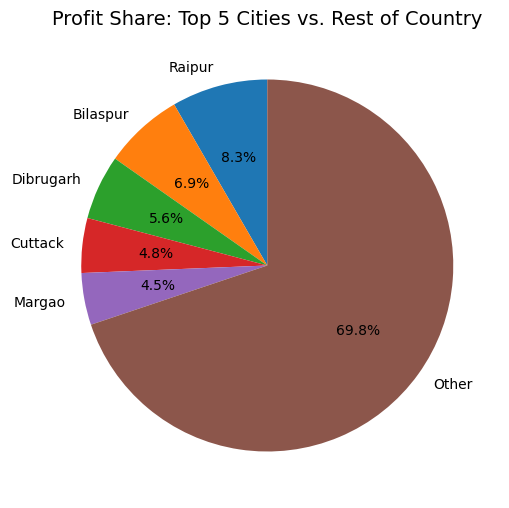

In [7]:
plt.figure(figsize=(6,8))

plt.pie(
    top5_city['total_profit'],
    labels=top5_city['city'],
    autopct="%1.1f%%",
    startangle=90
)

plt.title('Profit Share: Top 5 Cities vs. Rest of Country', fontsize=14)
plt.show()